In [7]:
import pandas as pd

# Load the provided CSV files
file_paths = ["filtreeritud_valim.csv", "jarelravi_episoodid_1a.csv", "teraapiad_1a.csv"]

# Reading the files
filtreeritud_valim = pd.read_csv(file_paths[0])
jarelravi_episoodid = pd.read_csv(file_paths[1])
teraapiad = pd.read_csv(file_paths[2])

# Displaying the first few rows of each dataframe to understand their structure
data_overview = {
    "filtreeritud_valim": filtreeritud_valim.head(),
    "jarelravi_episoodid": jarelravi_episoodid.head(),
    "teraapiad": teraapiad.head()
}

data_overview

{'filtreeritud_valim':    Unnamed: 0        id  vanus sugu maakond pohidiagnoos  charlson_total_quan  \
 0           1  ID121340     84    N   Tartu        I63.5                    5   
 1           2   ID42011     58    M   Harju        I63.5                    4   
 2           3   ID70891     80    N   Harju        I63.4                    3   
 3           4   ID77834     74    N   Järva        I63.5                    4   
 4           5   ID64433     66    N   Põlva        I63.0                    6   
 
    charlson_total_original  elixhauser_total_vw  elixhauser_total_swiss  ...  \
 0                        5                    9                       8  ...   
 1                        5                   19                      27  ...   
 2                        4                    8                       9  ...   
 3                        4                   23                      26  ...   
 4                        6                   33                      45  ...  

In [11]:
# Removing rows where all four therapy types are NA 

# For filtreeritud_valim dataset
therapy_columns_fv = ["fusioteraapia_ar", "logopeedia_ar", "psuhholoogia_ar", "tegevusteraapia_ar"]
filtreeritud_valim_cleaned = filtreeritud_valim.dropna(subset=therapy_columns_fv, how='all')

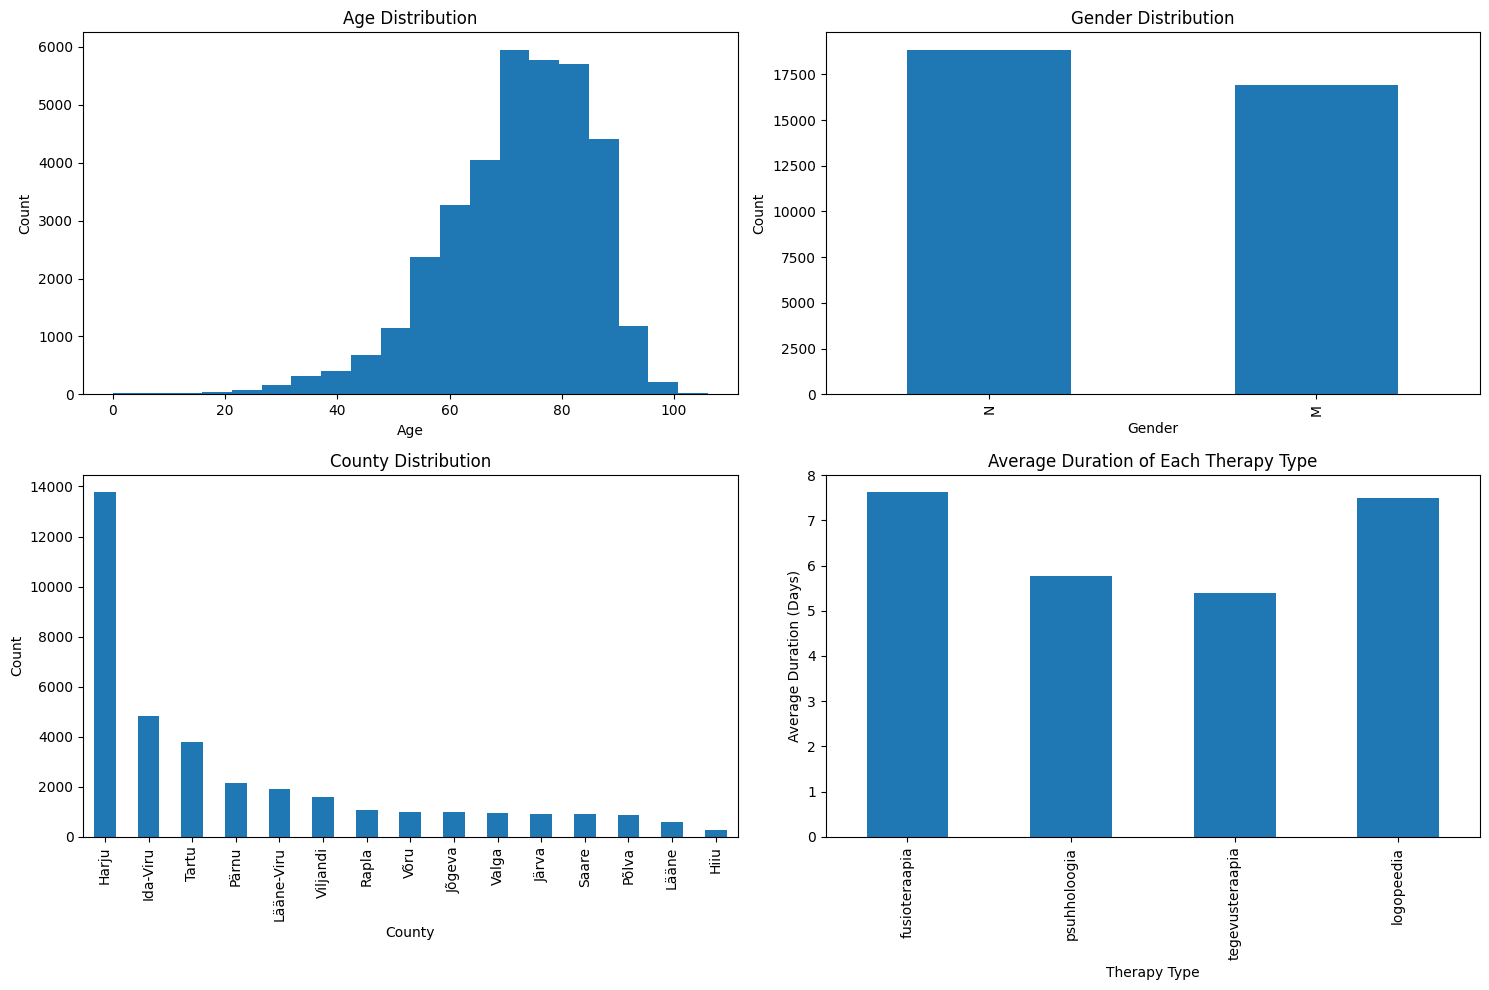

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

# Assuming filtreeritud_valim, filtreeritud_valim_cleaned, jarelravi_episoodid are predefined dataframes

# Preparing data for the requested visualizations

# Age distribution
age_dist = filtreeritud_valim['vanus']

# Gender distribution
gender_dist = filtreeritud_valim['sugu'].value_counts()

# County distribution
county_dist = filtreeritud_valim['maakond'].value_counts()

# Calculating therapy duration: 'ar_lopp' - 'ar_algus'
filtreeritud_valim_cleaned.loc[:, 'ar_algus'] = pd.to_datetime(filtreeritud_valim_cleaned['ar_algus'], errors='coerce', format='%d/%m/%Y')
filtreeritud_valim_cleaned.loc[:, 'ar_lopp'] = pd.to_datetime(filtreeritud_valim_cleaned['ar_lopp'], errors='coerce', format='%d/%m/%Y')
filtreeritud_valim_cleaned.loc[:, 'therapy_duration'] = (filtreeritud_valim_cleaned['ar_lopp'] - filtreeritud_valim_cleaned['ar_algus']).dt.days

# Amount of each type of therapy
therapy_types = jarelravi_episoodid[['fusioteraapia', 'psuhholoogia', 'tegevusteraapia', 'logopeedia']].mean()

# Creating the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Age distribution plot
# Use the correct axes for the histogram
axes[0, 0].hist(age_dist, bins=20)  # Changed from plt.hist() to axes[0, 0].hist()
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Gender distribution plot
gender_dist.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# County distribution plot
county_dist.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('County Distribution')
axes[1, 0].set_xlabel('County')
axes[1, 0].set_ylabel('Count')

# Therapy types plot
therapy_types.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Average Duration of Each Therapy Type')
axes[1, 1].set_xlabel('Therapy Type')
axes[1, 1].set_ylabel('Average Duration (Days)')

plt.tight_layout()
plt.show()
